<img src="../../../../imgs/CampQMIND_banner.png">

# XGBoost - Xtreme Gradient Boosting 

XGBoost is a gradient boosted machine learning library. It is one of the efficient implementations of gradient boosted machines. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#XGBoost---Xtreme-Gradient-Boosting" data-toc-modified-id="XGBoost---Xtreme-Gradient-Boosting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>XGBoost - Xtreme Gradient Boosting</a></span><ul class="toc-item"><li><span><a href="#Authors-explaining-xgboost" data-toc-modified-id="Authors-explaining-xgboost-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Authors explaining xgboost</a></span></li></ul></li><li><span><a href="#Installing-the-package" data-toc-modified-id="Installing-the-package-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Installing the package</a></span></li><li><span><a href="#Standard-Usage" data-toc-modified-id="Standard-Usage-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Standard Usage</a></span></li><li><span><a href="#Sample-Grid-Search" data-toc-modified-id="Sample-Grid-Search-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sample Grid Search</a></span></li><li><span><a href="#A-Worked-Example" data-toc-modified-id="A-Worked-Example-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>A Worked Example</a></span></li><li><span><a href="#Resources" data-toc-modified-id="Resources-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Resources</a></span></li></ul></div>

In [16]:
from IPython.display import IFrame
IFrame('https://www.youtube.com/embed/OtD8wVaFm6E',560,315)

## Authors explaining xgboost

https://xgboost.readthedocs.io/en/latest/tutorials/model.html

# Installing the package
``` python
!pip install xgboost
```



# Standard Usage
``` python
import  xgboost as Xgb
```

# Sample Grid Search

```python
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.01, n_estimators=500, objective='binary:logistic',
                    silent=True, nthread=1) # Low learning rate is prefered.

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=4, cv=3, verbose=3, random_state=0)
```

source: https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost

# A Worked Example

In [3]:
import numpy as np 
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from category_encoders import TargetEncoder

In [4]:
# Loading in the data
df = pd.read_csv("train.csv",index_col=0)

In [5]:
# Selecting categorical columns and encoding them.
# XGBoost on its own doesn't deal with categorical variables

cat_cols = df.select_dtypes('O').columns.tolist()
enc = TargetEncoder(cols=cat_cols).fit(df.select_dtypes('O'), df.target)
df[cat_cols] = enc.transform(df.select_dtypes('O'))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis=1),df.target,random_state=0)

In [8]:
%%time
params = {'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 2, 'colsample_bytree': 0.8}
model = xgb.XGBClassifier(**params,n_jobs=-1,random_state=0) # Optionally use tree_method='gpu_hist' to use GPU
model.fit(X_train,y_train)

CPU times: user 1min 43s, sys: 770 ms, total: 1min 43s
Wall time: 1min 49s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=2,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [11]:
preds = model.predict_proba(X_test)
roc_auc_score(y_test,preds[:,1])

0.7927797324983318

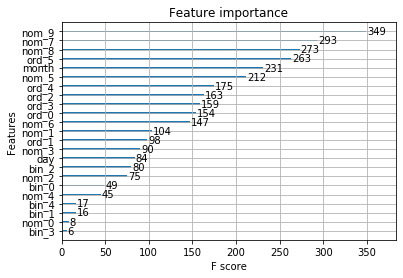

In [13]:
xgb.plot_importance(model)

# Resources
- https://www.youtube.com/watch?v=4rikgkt4IcU - Using XGBoost for Time Series Forecasting in Python | XGBoost for Stock Price Prediction Tutorial
- https://www.youtube.com/watch?v=V5158Oug4W8 - Topic 10. Part 2. Key ideas behind Xgboost, LightGBM, and CatBoost. Practice with LightGBM